Load and Inspect the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

file_path = r"C:\Users\dileb\Downloads\Project4\Team_BioByte\GSE139495_Single_cell_metaData_10252019.tsv\GSE139495_Single_cell_metaData_10252019.tsv"
df = pd.read_csv(file_path, sep='\t')

# Display the first 10 rows of the DataFrame
df.head(15)


,cells,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,alra_snn_res.0.5,seurat_clusters,samples
0,ACAGCTAAGGGTTCCC,Unfiltered_control,7,4,0.000000,9,9,Unfiltered_control
1,ACATACGTCATTTGGG,Unfiltered_control,7,7,0.036010,9,9,Unfiltered_control
2,ACATCAGAGTCGTACT,Unfiltered_control,11,6,0.000000,9,9,Unfiltered_control
3,AGAGTGGGTGCAACTT,Unfiltered_control,7,4,0.150754,9,9,Unfiltered_control
4,AGGCCACGTTCGCGAC,Unfiltered_control,9,2,0.000000,9,9,Unfiltered_control
5,AGTGGGACATCCGGGT,Unfiltered_control,9,4,0.000000,9,9,Unfiltered_control
6,ATCACGAGTCCAGTTA,Unfiltered_control,8,8,0.000000,9,9,Unfiltered_control
7,ATCATGGGTCCGACGT,3,9,8,0.000000,9,9,Filtered_samples
8,ATTACTCCAGATCTGT,Unfiltered_control,12,5,0.000000,9,9,Unfiltered_control
9,CAAGATCGTCCATCCT,3,13,5,0.000000,9,9,Filtered_samples


In [2]:
# Display basic information about the DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cells             12330 non-null  object 
 1   orig.ident        12330 non-null  object 
 2   nCount_RNA        12330 non-null  int64  
 3   nFeature_RNA      12330 non-null  int64  
 4   percent.mt        12330 non-null  float64
 5   alra_snn_res.0.5  12330 non-null  int64  
 6   seurat_clusters   12330 non-null  int64  
 7   samples           12330 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 770.8+ KB
None


In [3]:
# Display summary statistics
print(df.describe())

         nCount_RNA  nFeature_RNA    percent.mt  alra_snn_res.0.5  \
count  12330.000000  12330.000000  12330.000000      12330.000000   
mean    3735.571127   1144.335766      2.766584          3.166423   
std     2443.691446    547.261865      1.229842          3.327995   
min        5.000000      1.000000      0.000000          0.000000   
25%     2245.000000    754.000000      1.933967          0.000000   
50%     3386.000000   1117.000000      2.564431          2.000000   
75%     4524.000000   1393.750000      3.422168          5.000000   
max    44569.000000   5041.000000      7.496464         14.000000   

       seurat_clusters  
count     12330.000000  
mean          3.166423  
std           3.327995  
min           0.000000  
25%           0.000000  
50%           2.000000  
75%           5.000000  
max          14.000000  


In [4]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 cells               0
orig.ident          0
nCount_RNA          0
nFeature_RNA        0
percent.mt          0
alra_snn_res.0.5    0
seurat_clusters     0
samples             0
dtype: int64


Data Visualization

Text(0.5, 1.0, 'Distribution of nCount_RNA')

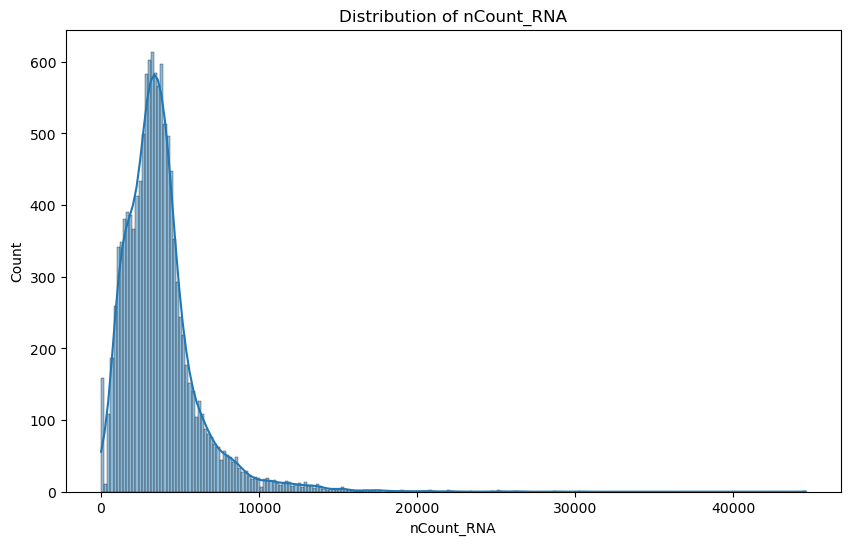

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['nCount_RNA'], kde=True)
plt.title('Distribution of nCount_RNA')

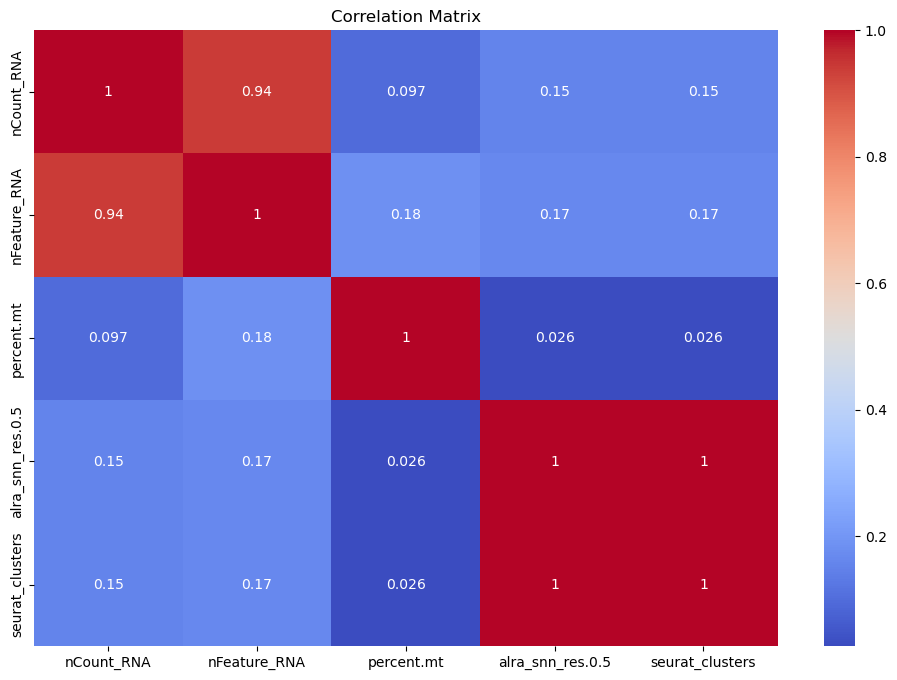

In [6]:
# Select only numeric columns
df = df.select_dtypes(include=[float, int])

# Plot a correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Splitting the Data

In [7]:
from sklearn.model_selection import train_test_split
# Prepare features and labels
X = df.drop('nCount_RNA', axis=1)
y = df['nFeature_RNA']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

LogisticRegression

In [8]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\dileb\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Training & Evaluation

In [9]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         2
          43   

c:\Users\dileb\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no 

Elbow Method

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [13]:
# Create lists to store inertia values and the corresponding values of k
inertia_values = []
k_values = range(1, 11)

In [14]:
# Create a for-loop to evaluate each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

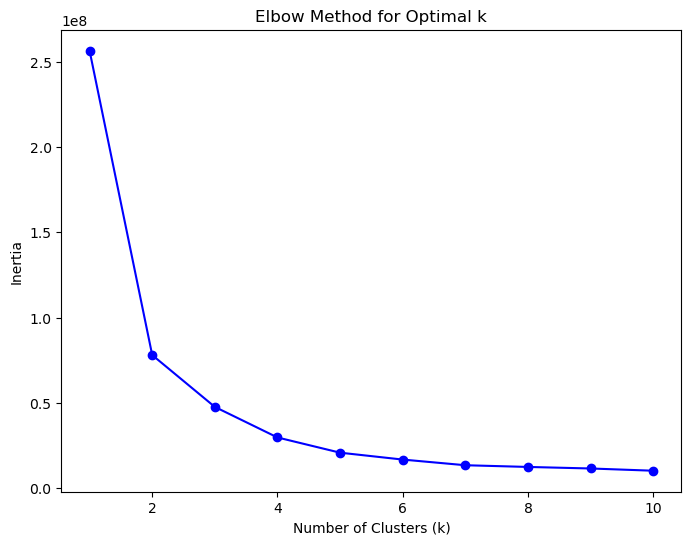

In [15]:
# Plot the results to create the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

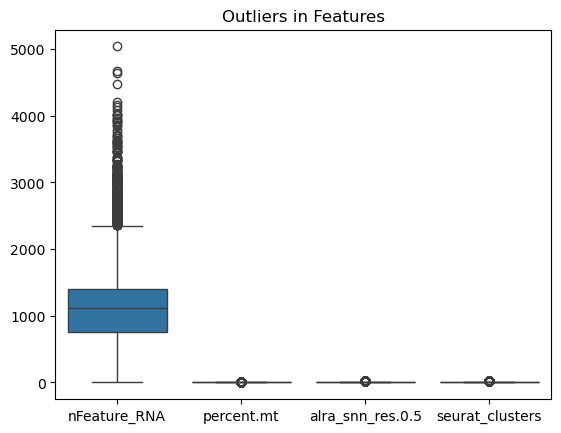

In [17]:
# Check for outliers using boxplot
sns.boxplot(data=df.drop(columns=['nCount_RNA'])) 
plt.title("Outliers in Features")
plt.show()

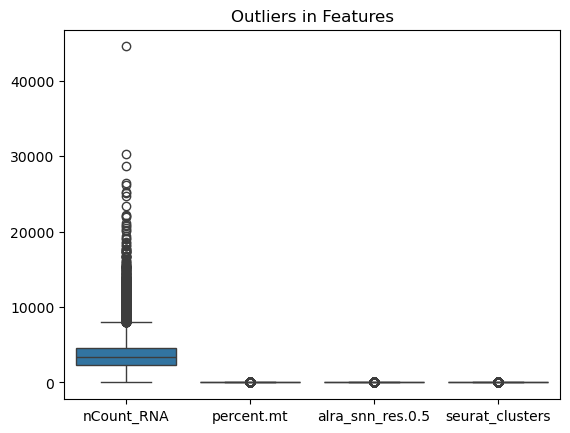

In [18]:
# Check for outliers using boxplot
sns.boxplot(data=df.drop(columns=['nFeature_RNA']))  
plt.title("Outliers in Features")
plt.show()

Aggregate the Data

Sample the Data

Logarithmic Transformation

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r"C:\Users\dileb\Downloads\Project4\Team_BioByte\final_clean_df (1)"
df = pd.read_csv(file_path, sep='\t')
df.head(15)

,cells,orig.ident,FAM138A,OR4F5,OR4F29,OR4F16,FAM87B,LINC00115,FAM41C,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,C1orf159,LINC01342,TTLL10,TNFRSF18,TNFRSF4,SDF4,B3GALT6,C1QTNF12,UBE2J2,LINC01786,SCNN1D,ACAP3,PUSL1,INTS11,CPTP,TAS1R3,DVL1,MXRA8,AURKAIP1,CCNL2,MRPL20,ANKRD65,TMEM88B,LINC01770,VWA1,ATAD3C,ATAD3B,ATAD3A,TMEM240,SSU72,FNDC10,MIB2,MMP23B,CDK11B,SLC35E2B,CDK11A,SLC35E2A,NADK,GNB1,CALML6,TMEM52,CFAP74,GABRD,PRKCZ,FAAP20,SKI,MORN1,RER1,PEX10,PLCH2,PANK4,HES5,TNFRSF14,FAM213B,MMEL1,TTC34,ACTRT2,LINC00982,PRDM16,ARHGEF16,MEGF6,TPRG1L,WRAP73,TP73,CCDC27,SMIM1,LRRC47,CEP104,DFFB,C1orf174,LINC01134,LINC01346,LINC01345,LINC01777,LINC01646,AJAP1,NPHP4,KCNAB2,CHD5,RPL22,RNF207,ICMT,LINC00337,HES3,GPR153,ACOT7,HES2,ESPN,TNFRSF25,PLEKHG5,NOL9,TAS1R1,ZBTB48,KLHL21,PHF13,THAP3,DNAJC11,LINC01672,CAMTA1,VAMP3,PER3,UTS2,TNFRSF9,PARK7,ERRFI1,LINC01714,SLC45A1,RERE,ENO1,CA6,SLC2A7,SLC2A5,GPR157,MIR34AHG,LINC01759,H6PD,SPSB1,SLC25A33,TMEM201,PIK3CD,CLSTN1,CTNNBIP1,LZIC,NMNAT1,RBP7,UBE4B,KIF1B,PGD,CENPS,CORT,DFFA,PEX14,CASZ1,C1orf127,TARDBP,MASP2,SRM,EXOSC10,MTOR,ANGPTL7,UBIAD1,DISP3,LINC01647,FBXO2,FBXO44,FBXO6,MAD2L2,DRAXIN,AGTRAP,C1orf167,MTHFR,CLCN6,NPPA,NPPB,KIAA2013,PLOD1,MFN2,MIIP,TNFRSF8,TNFRSF1B,VPS13D,DHRS3,AADACL4,AADACL3,C1orf158,PRAMEF12,PRAMEF1,LINC01784,PRAMEF11,HNRNPCL1,PRAMEF2,PRAMEF4,PRAMEF10,PRAMEF7,PRAMEF6,PRAMEF27,HNRNPCL3,PRAMEF25,HNRNPCL2,PRAMEF26,HNRNPCL4,PRAMEF9,PRAMEF13,PRAMEF18,PRAMEF5,PRAMEF8,PRAMEF33,PRAMEF15,PRAMEF14,PRAMEF19,PRAMEF17,PRAMEF20,LRRC38,PDPN,PRDM2,KAZN,TMEM51,C1orf195,FHAD1,EFHD2,CTRC,CELA2A,CELA2B,CASP9,DNAJC16,AGMAT,DDI2,RSC1A1,PLEKHM2,SLC25A34,TMEM82,FBLIM1,UQCRHL,SPEN,ZBTB17,SRARP,HSPB7,CLCNKA,CLCNKB,FAM131C,EPHA2,ARHGEF19,CPLANE2,FBXO42,SZRD1,SPATA21,NECAP2,LINC01772,LINC01783,NBPF1,CROCC,MFAP2,ATP13A2,SDHB,PADI2,PADI1,PADI3,PADI4,PADI6,RCC2,ARHGEF10L,ACTL8,LINC01654,IGSF21,KLHDC7A,PAX7,TAS1R2,ALDH4A1,IFFO2,UBR4,EMC1,MRTO4,AKR7A3,AKR7A2,PQLC2,CAPZB,MINOS1,NBL1,HTR6,TMCO4,RNF186,OTUD3,PLA2G2E,PLA2G2A,PLA2G5,PLA2G2D,PLA2G2F,PLA2G2C,UBXN10,LINC01757,VWA5B1,LINC01141,CAMK2N1,MUL1,FAM43B,CDA,PINK1,DDOST,KIF17,SH2D5,HP1BP3,EIF4G3,ECE1,NBPF3,ALPL,RAP1GAP,USP48,LDLRAD2,HSPG2,CELA3B,CELA3A,LINC01635,CDC42,WNT4,ZBTB40,EPHA8,C1QA,C1QC,C1QB,EPHB2,LACTBL1,TEX46,KDM1A,LUZP1,HTR1D,LINC01355,HNRNPR,ZNF436,TCEA3,ASAP3,E2F2,ID3,MDS2,RPL11,ELOA,PITHD1,LYPLA2,GALE,HMGCL,FUCA1,CNR2,PNRC2,SRSF10,MYOM3,IL22RA1,IFNLR1,GRHL3,STPG1,NIPAL3,RCAN3,NCMAP,SRRM1,CLIC4,RUNX3,SYF2,RSRP1,RHD,TMEM50A,RHCE,MACO1,LDLRAP1,MAN1C1,SELENON,MTFR1L,AUNIP,PAQR7,STMN1,PAFAH2,EXTL1,SLC30A2,TRIM63,PDIK1L,FAM110D,C1orf232,ZNF593,CNKSR1,CATSPER4,CEP85,SH3BGRL3,UBXN11,CD52,CRYBG2,ZNF683,LIN28A,DHDDS,HMGN2,RPS6KA1,ARID1A,PIGV,ZDHHC18,SFN,GPN2,GPATCH3,NUDC,NR0B2,KDF1,TRNP1,TENT5B,SLC9A1,WDTC1,TMEM222,SYTL1,MAP3K6,FCN3,CD164L2,GPR3,WASF2,AHDC1,FGR,LINC02574,IFI6,FAM76A,STX12,PPP1R8,THEMIS2,RPA2,SMPDL3B,XKR8,EYA3,PTAFR,DNAJC8,ATP5IF1,SESN2,MED18,PHACTR4,RCC1,TRNAU1AP,SNHG12,TAF12,RAB42,LINC01715,GMEB1,YTHDF2,OPRD1,EPB41,TMEM200B,SRSF4,MECR,PTPRU,LINC01756,LINC01648,MATN1,LAPTM5,LINC01778,SDC3,PUM1,NKAIN1,SNRNP40,ZCCHC17,FABP3,SERINC2,TINAGL1,HCRTR1,PEF1,COL16A1,ADGRB2,SPOCD1,PTP4A2,KHDRBS1,TMEM39B,KPNA6,TXLNA,CCDC28B,IQCC,DCDC2B,TMEM234,EIF3I,FAM167B,LCK,HDAC1,MARCKSL1,TSSK3,FAM229A,BSDC1,ZBTB8B,ZBTB8A,ZBTB8OS,RBBP4,SYNC,KIAA1522,YARS,S100PBP,FNDC5,HPCA,TMEM54,RNF19B,AK2,AZIN2,TRIM62,ZNF362,A3GALT2,PHC2,ZSCAN20,CSMD2,HMGB4,C1orf94,SMIM12,GJB5,GJB4,GJB3,GJA4,DLGAP3,TMEM35B,ZMYM6,ZMYM1,SFPQ,ZMYM4,KIAA0319L,NCDN,TFAP2E,PSMB2,C1orf216,CLSPN,AGO4,AGO1,AGO3,TEKT2,ADPRHL2,COL8A2,TRAPPC3,MAP7D1,THRAP3,SH3D21,EVA1B,STK40,LSM10,OSCP1,MRPS15,CSF3R,GRIK3,LINC01137,ZC3H12A,MEAF6,SNIP1,DNALI1,GNL2,RSPO1,C1orf109,CDCA8,EPHA10,MANEAL,YRDC,C1orf122,MTF1,INPP5B,SF3A3,FHL3,UTP11,POU3F1,LINC01343,LINC01685,RRAGC,MYCBP,GJA9,RHBDL2,AKIRIN1,NDUFS5,MACF1,BMP8A,PABPC4,HEYL,NT5C1A,HPCAL4,PPIE,BMP8B,OXCT2,TRIT1,MYCL,MFSD2A,CAP1,PPT1,RLF,TMCO2,ZMPSTE24,COL9A2,SMAP2,ZFP69B,ZFP69,EXO5,ZNF684,RIMS3,NFYC,KCNQ4,CITED4,CTPS1,SLFNL1,SCMH1,FOXO6,EDN2,HIVEP3,GUCA2B,

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

file_path = r"C:\Users\dileb\Downloads\Project4\Team_BioByte\final_clean_df (1)"

# Load the dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels (0 = benign, 1 = malignant)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression Model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Predict and Evaluate
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9766081871345029

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [22]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[ 59   4]
 [  1 107]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy: 0.9707602339181286


c:\Users\dileb\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


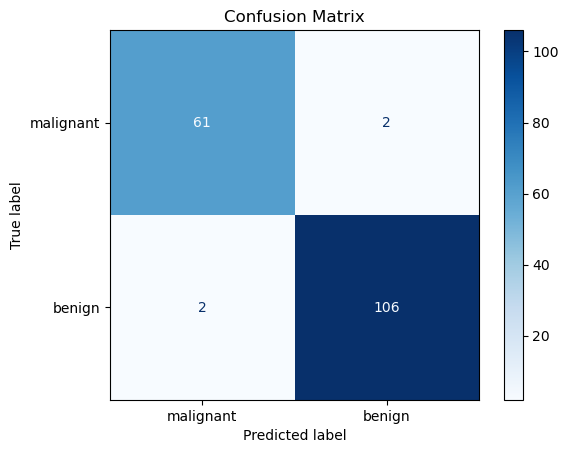

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [24]:
# Create lists to store inertia values and the corresponding values of k
inertia_values = []
k_values = range(1, 11)

In [25]:
# Create a for-loop to evaluate each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

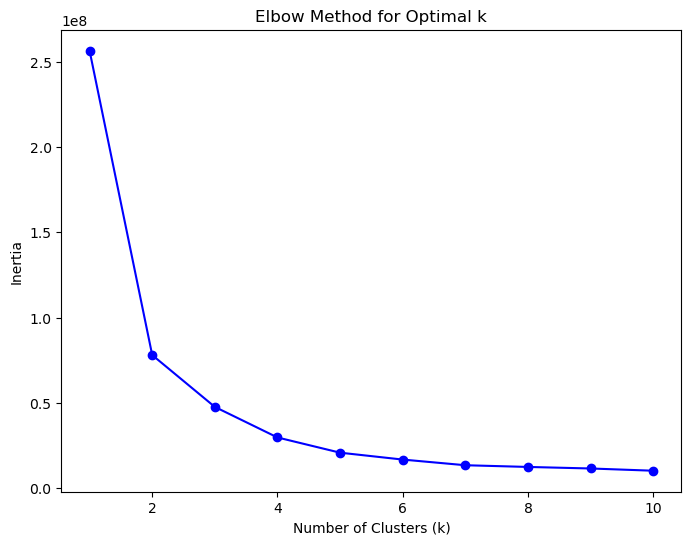

In [26]:
# Plot the results to create the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()